In [2]:
# Put all imports here
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline
from scipy.signal import argrelextrema

# Problem 1
Differentiate the functions cos(x) and exp(x) at x = 0.1, 10 using single precision forward-, central- and extrapolated-difference algorithms.  

a) Write a code that implements these three methods. 

In [3]:
# Numerical differentiation in single precision (float32)

float32 = np.float32

def f_cos(x):  # make mega sure we are using float32
    return float32(np.cos(x, dtype=np.float32))

def f_exp(x):
    return float32(np.exp(x, dtype=np.float32))

def df_cos(x):
    return float32(-np.sin(x, dtype=np.float32))

def df_exp(x):
    return float32(np.exp(x, dtype=np.float32))

# Algorithms

def forward(f, x, h):
    #cast as float32
    x, h = float32(x),float32(h)
    return ((f(x+h)) - (f(x))) / h

def central(f, x, h):
    #cast as float32
    x, h = float32(x), float32(h)
    return (f(x+h) - f(x-h)) / (float32(2) * h)

def extrapolated(f, x, h):
    #cast as float32
    x, h = float32(x), float32(h)
    return (-f(x+2*h) + float32(8)*f(x+h) - float32(8)*f(x-h) + f(x-float32(2)*h))/(float32(12)*h)


# Pretty print :)
x_vals = [0.1, 10.0]
h = np.float32(0.1)

print("For cos(x):")
for x in x_vals:
    print(f"x = {x}")
    print(f"  Exact: {df_cos(x)}")
    print(f"  Forward difference method: {forward(f_cos, x, h)}")
    print(f"  Central difference method: {central(f_cos, x, h)}")
    print(f"  Extrapolation method: {extrapolated(f_cos, x, h)}\n")

print("For exp(x):")
for x in x_vals:
    print(f"x = {x}")
    print(f"  Exact: {df_cos(x)}")
    print(f"  Forward difference method: {forward(f_exp, x, h)}")
    print(f"  Central difference method: {central(f_exp, x, h)}")
    print(f"  Extrapolation method: {extrapolated(f_exp, x, h)}\n")

For cos(x):
x = 0.1
  Exact: -0.0998334214091301
  Forward difference method: -0.1493757963180542
  Central difference method: -0.0996670126914978
  Extrapolation method: -0.09983300417661667

x = 10.0
  Exact: 0.5440210700035095
  Forward difference method: 0.5850356817245483
  Central difference method: 0.5431169271469116
  Extrapolation method: 0.544022262096405

For exp(x):
x = 0.1
  Exact: -0.0998334214091301
  Forward difference method: 1.1623179912567139
  Central difference method: 1.1070138216018677
  Extrapolation method: 1.1051676273345947

x = 10.0
  Exact: 0.5440210700035095
  Forward difference method: 23165.48828125
  Central difference method: 22063.26171875
  Extrapolation method: 22026.482421875



b) Make a log-log plot of the relative error ε vs step size h and check whether the scaling and the number of significant digits obtained agrees with simple estimates.

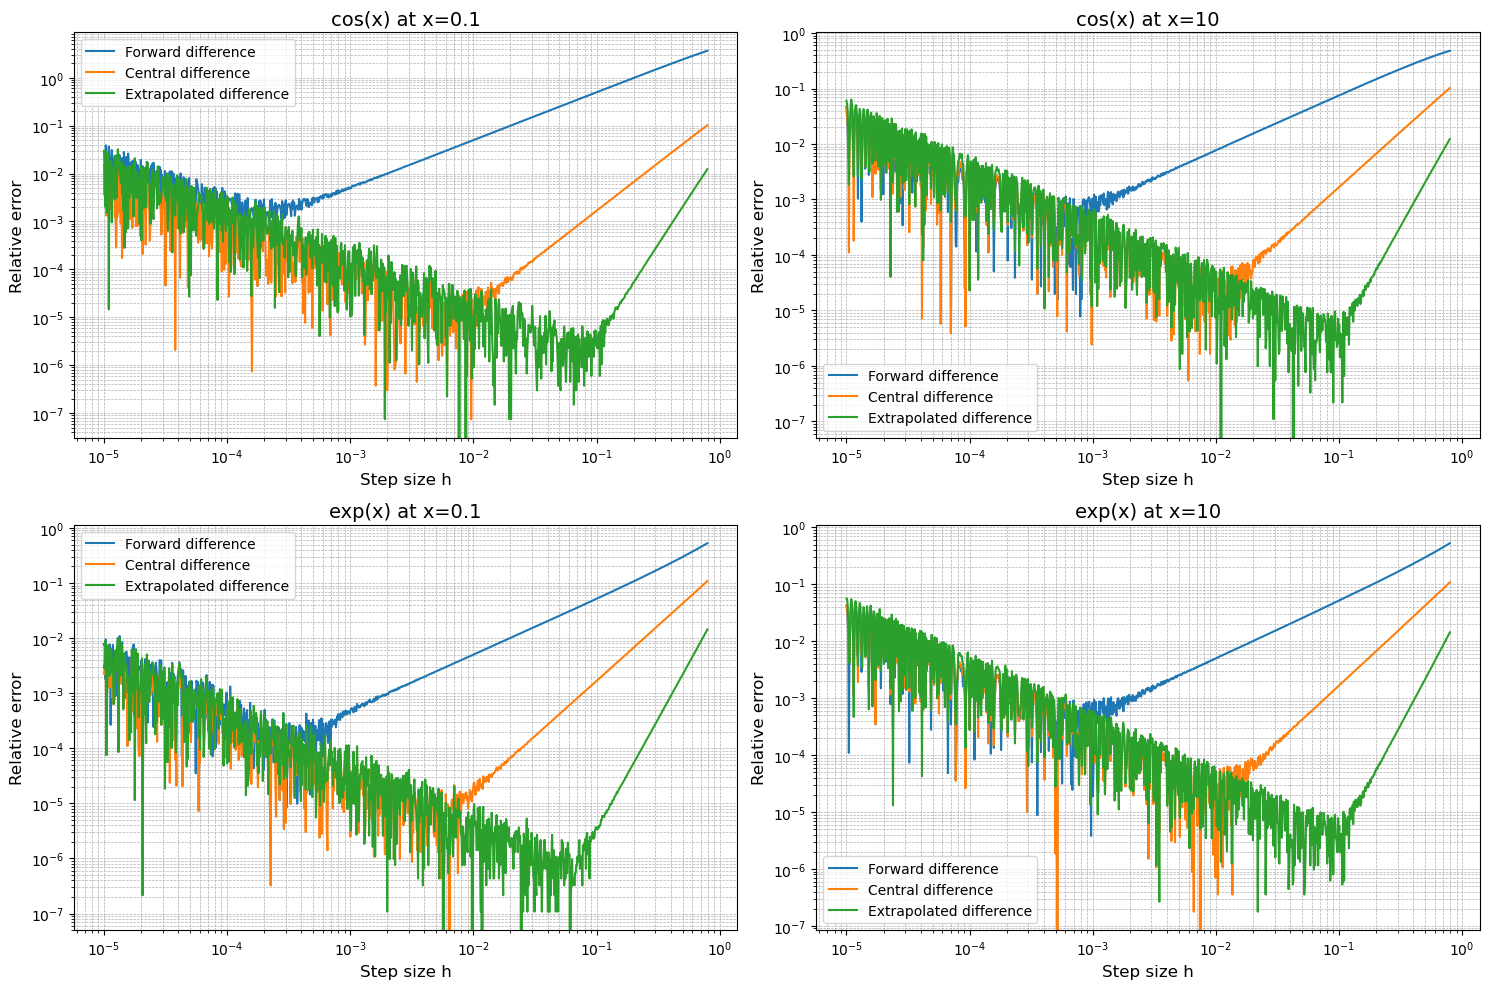

In [7]:
# Relative error = |Measured Value - Actual Value| / |Actual Value| 
def relative_error(meas,act,f,x,h):
    return np.abs(meas(f,x,h) - act(x), dtype=np.float32)/np.abs(act(x), dtype=np.float32)

h_sweep = np.logspace(-5, -0.1, 1000, dtype=np.float32)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        
functions = [(f_cos, df_cos, "cos(x) at x=0.1", 0.1),
             (f_cos, df_cos, "cos(x) at x=10", 10.0),
             (f_exp, df_exp, "exp(x) at x=0.1", 0.1),
             (f_exp, df_exp, "exp(x) at x=10", 10.0)]

for i, (f, df, title, xval) in enumerate(functions):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    
    ax.loglog(h_sweep, relative_error(forward, df, f, xval, h_sweep), label="Forward difference")
    ax.loglog(h_sweep, relative_error(central, df, f, xval, h_sweep), label="Central difference")
    ax.loglog(h_sweep, relative_error(extrapolated, df, f, xval, h_sweep), label="Extrapolated difference")

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Step size h", fontsize=12)
    ax.set_ylabel("Relative error", fontsize=12)
    ax.legend()
    ax.grid(True, which="both", ls="--", lw=0.5)

plt.tight_layout()
plt.show()


# Problem 2
Consider the integral,

$$I = \int_0^1 exp(-t) \,dt$$

And compare the relative error, ε, for the midpoint rule, trapezoid rule, and Simpson’s rule for single precision.



a) Write code that implements each method.

In [37]:
def midpoint_rule(N):
    N = np.int32(N)
    h = float32(1.0 / N)
    # midpoints from 0+h/2 up to 1-h/2
    x = (np.arange(N, dtype=np.float32) + 0.5) * h
    return h * np.sum(np.exp(-x, dtype=np.float32))

def trapezoid_rule(N):
    N = np.int32(N)
    h = float32(1.0 / N)
    x = np.linspace(0, 1, N+1, dtype=np.float32)
    y = np.exp(-x, dtype=np.float32)
    return h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])

def simpson_rule(N):
    if N % 2 == 1:
        N += 1
    N = np.int32(N)
    h = float32(1.0 / N)
    x = np.linspace(0, 1, N+1, dtype=np.float32)
    y = np.exp(-x, dtype=np.float32)
    return (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

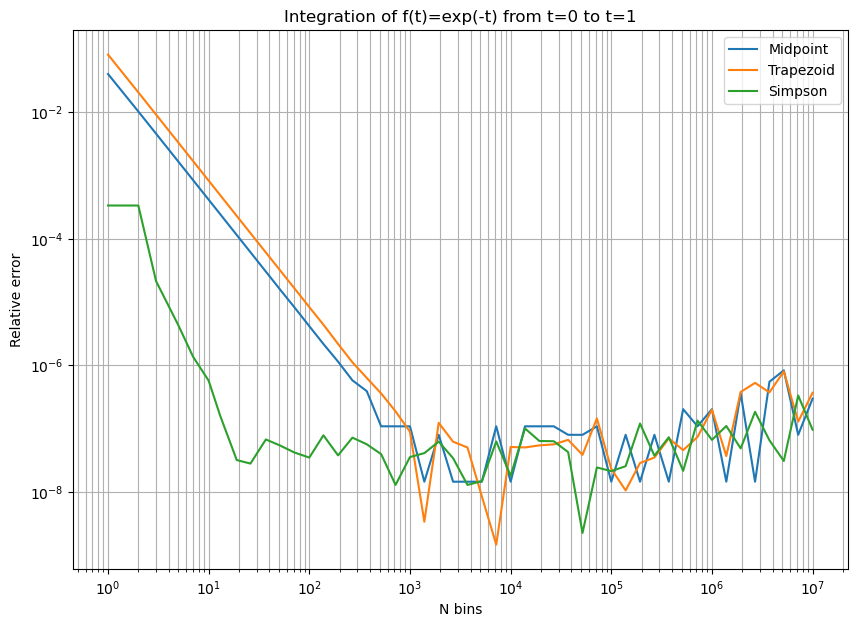

In [36]:
# 2b) Relative error and plot

I_exact = 1 - np.exp(-1.0)

def rel_err_mid(N):
    return abs((midpoint_rule(N) - I_exact) / I_exact)

def rel_err_trap(N):
    return abs((trapezoid_rule(N) - I_exact) / I_exact)

def rel_err_simp(N):
    return abs((simpson_rule(N) - I_exact) / I_exact)

N_vals = np.unique(np.logspace(0, 7, 50, dtype=int))
errors_mid = [rel_err_mid(N) for N in N_vals]
errors_trap = [rel_err_trap(N) for N in N_vals]
errors_simp = [rel_err_simp(N) for N in N_vals]

plt.figure(figsize=(10,7))
plt.loglog(N_vals, errors_mid, label="Midpoint")
plt.loglog(N_vals, errors_trap, label="Trapezoid")
plt.loglog(N_vals, errors_simp, label="Simpson")

plt.title("Integration of f(t)=exp(-t) from t=0 to t=1")
plt.xlabel("N bins")
plt.ylabel("Relative error")
plt.legend()
plt.grid(True, which="both")
plt.show()


3) In cosmology, density fluctuations in the matter distribution are characterized by a
power spectrum, P(k), the rms amplitude fluctuations of the density waves, as a function
of wavenumber k (with units of h/Mpc). In configuration space, these density fluctuations
are described by the correlation function, ξ(r), at a given scale r, usually in Mpc/h. These
two are quantities are related by

$$
\xi(r) \;=\; \frac{1}{2\pi^2} \int dk \; k^2 \, P(k) \, \frac{\sin(kr)}{kr}
$$


With this homework, I have attached a tabulated power spectrum. The first column is k
and the second column is P(k) (pay no attention to the third column). Using whatever
integration method you prefer, use the above equation to calculate ξ(r) in the range
r=[50,120] Mpc/h. The power spectrum is tabulated in logarithmic intervals in k, due to
it’s power-law like nature. You may choose to use an interpolation technique, such as
cubic spline, to help evaluate the integral.
Around k~0.1, you can see oscillatory behavior in P(k). We call these the “baryon wiggles,” and they manifest as a single “bump” in the correlation function at large scales. Using your calculation for ξ(r), determine the scale, r, of the peak of this bump.
Make a plot of r2 ξ(r) over the required range in r (multiplying by r^2 visually enhances the bump). Indicate on this plot the scale of the peak, also known as the “baryon acoustic oscillation” (BAO) peak.


Notes:<br>
a) If you use spline interpolation, you are not required to code that up yourself. You
may use a pre-packaged routine (or numerical recipes code).<br>
b) Formally, the limits of the integral are from k=0 to k=infinity. Note that P(0)=0. You
may choose a finite upper limit, provided you can determine if your limit is robust.<br>
c) The ‘h’ in the distance units refers to the Hubble constant h=H0/100, which sets
the distance scale and is thus incorporated into the distance units, since its value
is unknown.

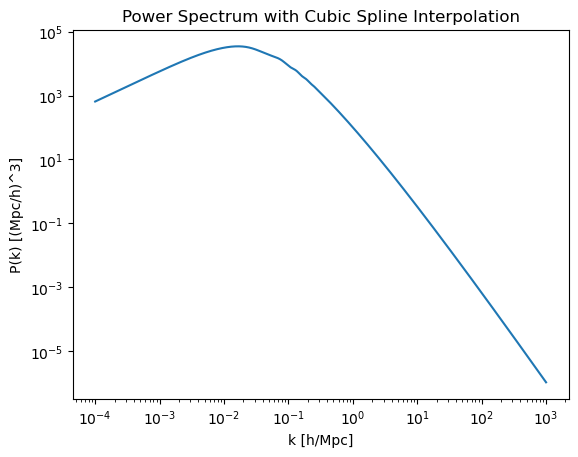

In [26]:
# Load power spectrum (k, P(k))
data = np.loadtxt("lcdm_z0.matter_pk", delimiter=" ", usecols=(0,1), dtype=np.float32)
k_data, P_data = data[:,0], data[:,1]

# Define P(k) using cubic spline interpolation
def P(k):
    spline = CubicSpline(k_data, P_data, extrapolate=False)
    out = spline(k)
    # Replace nans outside interpolation range with 0
    return np.where(np.isnan(out), 0.0, out)

# --- Midpoint integration for xi(r) ---
def xi_midpoint(r, N=200000, kmin=0.0, kmax=4000.0):
    # midpoints between kmin and kmax
    k_edges = np.linspace(kmin, kmax, N+1)
    h = (kmax - kmin)/N
    mids = k_edges[:-1] + 0.5*h
    integrand = mids**2 * P(mids) * np.sin(mids*r)/(mids*r)
    return (h/(2*np.pi**2)) * np.sum(integrand)


k_vals = np.logspace(np.log10(min(k_data)), np.log10(max(k_data)), 3000)
plt.loglog(k_vals, P(k_vals))
plt.xlabel("k [h/Mpc]")
plt.ylabel("P(k) [(Mpc/h)^3]")
plt.title("Power Spectrum with Cubic Spline Interpolation")
plt.show()

BAO peak at r = 105.57788944723617 Mpc/h, with value 15.697296533690425


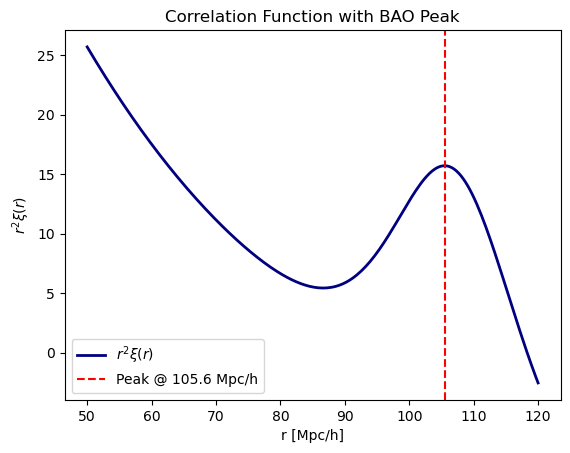

In [23]:
# xi(r) for range [50,120]
r_vals = np.linspace(50, 120, 200)
xi_vals = np.array([xi_midpoint(r) for r in r_vals])
r2xi = r_vals**2 * xi_vals

# Find BAO peak using argrelextrema
maxima_idx = argrelextrema(r2xi, np.greater)
r_peak, y_peak = r_vals[maxima_idx][0], r2xi[maxima_idx][0]

print(f"BAO peak at r = {r_peak} Mpc/h, with value {y_peak}")

# --- Plot r^2 xi(r) ---
plt.plot(r_vals, r2xi, color='navy', lw=2, label=r"$r^2 \xi(r)$")
plt.axvline(r_peak, color='red', linestyle='--', label=f"Peak @ {r_peak:.1f} Mpc/h")
plt.xlabel("r [Mpc/h]")
plt.ylabel(r"$r^2 \xi(r)$")
plt.title("Correlation Function with BAO Peak")
plt.legend()
plt.show()